In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
A=[20,10]
B=[80,10]
C=[70,30]
dreieck=np.array([A,B,C])
dreieck

array([[20, 10],
       [80, 10],
       [70, 30]])

In [2]:
d=dreieck.transpose()
d

array([[20, 80, 70],
       [10, 10, 30]])

In [3]:
skal=np.array([[2,0],[0,3]])

In [4]:
def linie(arr,x1,y1,x2,y2,f=0): #arr ist ein NumpyArray als Bild
    dx =  abs(x2 - x1)
    dy = -abs(y2 - y1)
    if x1 < x2: sx =  1
    else:       sx = -1
    if y1 < y2: sy =  1
    else:       sy = -1
    err = dx + dy #Fehler bei Diagonalschritt
    while True:
        arr[y1,x1]=0 # hier 
        #print (x1,y1,err)
        if x1==x2 and y1 ==y2:   break
        e2 = 2 * err
        if e2 >= dy: 
            err += dy 
            x1  += sx
        if e2 <= dx:
            err += dx
            y1  += sy


In [5]:
dreieck.shape


(3, 2)

In [6]:
def zeichneDreieck(arr,li): #li ist eine Liste aus 3 Paaren
    li=li.transpose()
    linie(arr,*li[0],*li[1])
    linie(arr,*li[1],*li[2])
    linie(arr,*li[2],*li[0])
def zeichneRechteck(arr,li): #li ist eine Liste aus 3 Paaren
    dx,dy= li[0][0]+li[2][0]-li[1][0],li[0][1]+li[2][1]-li[1][1]
    linie(arr,*li[0],*li[1])
    linie(arr,*li[1],*li[2])
    linie(arr,dx,dy,*li[2])
    linie(arr,dx,dy,*li[0])
    
def zeichnePolygon(arr,p,f=0):
    #p Liste aus Punkten werden der Reihe nach verbunden
    for i in range(len(p)-1):
        linie(arr,p[i][0],p[i][1],p[i+1][0],p[i+1][1],f)
    e=len(p)-1
    linie(arr,p[0][0],p[0][1],p[e][0],p[e][1],f)
           

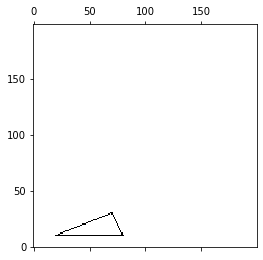

In [7]:
a=np.full((200,200),255,'int')
#eine Zeichenfläche aus 20x20 weissen Pixeln
zeichneDreieck(a,d)
#zeichneRechteck(a,dreieck)
plt.matshow(a,cmap=cm.gray, origin="lower")


In [8]:
def homogenisiere(figur):
    #macht aus der Liste der Koordinaten eine homogene Matrix
    m=np.full((3,figur.shape[0]),1,'int')
    m[:2,:]=np.transpose(figur)#
    return m
    
    
def verschiebe(figur,dx,dy):
    m=np.array([[1,0,dx],[0,1,dy],[0,0,1]])
    neu=np.dot(m,figur)
    return neu

def drehe(figur,w):
    w=np.radians(w)
    m=np.array([[np.cos(w),-np.sin(w),0],[np.sin(w),np.cos(w),0]\
                ,[0,0,1]])
    neu=np.dot(m,figur)
    return neu
    
def dreheUm(figur,p,w):
    px,py=p[0],p[1]
    m= verschiebe(figur,-px,-py)
    m=drehe(m,w)
    return verschiebe(m,px,py)
    
def strecke(figur,sx,sy=None):
    if not sy: sy=sx
    
    m=np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    print(m)
    return np.dot(m,figur)

def streckeAn(figur,p,sx,sy=None):
    if not sy: sy=sx
    px,py=p[0],p[1]
    m= verschiebe(figur,-px,-py)
    m=strecke(m,sx,sy)
    return verschiebe(m,px,py)

def zumZeichnen(figur):
    #macht aus der homogenen Matrix wieder eine Int_liste
    a=np.rint(figur).astype(int)#runden und umwandeln
    return np.transpose(a[:2,:])
    

[[1 2]
 [3 0]
 [2 2]]
[[1 3 2]
 [2 0 2]
 [1 1 1]]


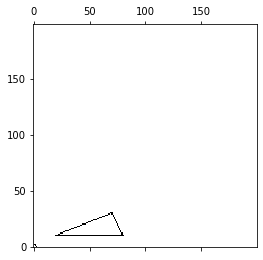

In [10]:
punkte = np.array([[20, 30], [60, 0], [120, 80]],"int")
p2=np.array([[20,10],[80,10],[80,30]])
p2=np.array([[1,2],[3,0],[2,2]])
print(p2)
m=homogenisiere(p2)
print(m)
r1=zumZeichnen(m)

zeichnePolygon(a,r1)
plt.matshow(a,cmap=cm.gray, origin="lower")